In [1]:
from ban.config.JSONConfig import JSONConfig
import simpy
from simpy.events import NORMAL

from ban.base.helper.mobility_helper import MobilityHelper, MovementPhase
from ban.base.mobility import MobilityModel, BodyPosition

import matplotlib.pyplot as plt

env = simpy.Environment()

# 앞에 애들은 움직이지 않는 애들임
positions = tuple(BodyPosition)[7:]
mob_helper = MobilityHelper(env)

mobs = []
for pos in positions:
    mob = MobilityModel(pos)
    mobs.append(mob)
    mob_helper.add_mobility_list(mob)

mobs_pos = [[] for _ in range(len(positions))]

def print_info(ev):
    for idx, mob in enumerate(mob_helper.mobility_list):
        pos = mob.get_position()
        mobs_pos[idx].append((pos.x, pos.y, pos.z))

    event = simpy.Event(env)
    event.env = env
    event._ok = True
    event.callbacks.append(print_info)
    
    env.schedule(event, priority=NORMAL, delay=0.05)

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(mob_helper.do_walking)
env.schedule(event, priority=NORMAL, delay=0)

event = simpy.Event(env)
event.env = env
event._ok = True
event.callbacks.append(print_info)
env.schedule(event, priority=NORMAL, delay=0)
env.run(until=50)


100%|██████████| 9/9 [00:00<00:00, 1152.56it/s]


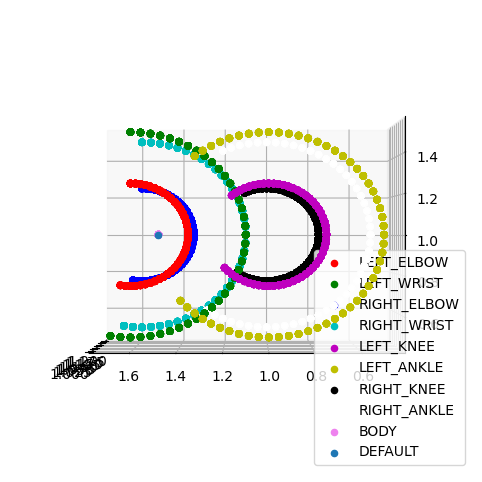

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm

# 임의의 mobs_pos 리스트 생성
# mobs_pos = [...]

colors = ('r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'violet', 'purple', 'lavender', 'darkorange', 'crimson', 'darkcyan', 'crimson')
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

ax.view_init(elev=0, azim=180)

for i, mob in enumerate(tqdm(mobs_pos)):
    xs, ys, zs = zip(*mob)  # 각 점의 x, y, z 좌표 분리
    ax.scatter(xs, ys, zs, color=colors[i % len(colors)], alpha=1, label=str(positions[i]).split('.')[1])  # 점들 그리기
    # ax.text(xs[0], ys[0], zs[0], str(positions[i]).split('.')[1], color="black")

ax.scatter(1.1, 1.5, 1, alpha=1, label="DEFAULT")

ax.legend()
plt.show()
